# Pandas Case Study - S&P500 Stocks<br>Valuation Data

In [1]:
# Dark mode ish
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [2]:
import pandas as pd

In [3]:
# load stock list and review first 10 rows
asofdatec = "20230101"
filenamec = "SP500_Constituents_"+asofdatec+".csv"
dfspc = pd.read_csv(filenamec,
                    index_col="Symbol", parse_dates=True)
dfspc.head()

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,,
MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
# load selected valuation-related measures
asofdatev = "20230101"
filenamev = "SP500_Valuation_"+asofdatev+".csv"
dfspv = pd.read_csv(filenamev, index_col="Symbol")
dfspv.head()

,SymbolYahoo,Closing Price,Market Cap,Beta,PE Ratio,EPS
Symbol,,,,,,
MMM,MMM,119.92,66.285B,1.00,10.46,11.46
AOS,AOS,57.24,8.745B,1.23,18.23,3.14
ABT,ABT,109.79,191.427B,0.70,24.78,4.43
ABBV,ABBV,161.61,285.804B,0.67,21.55,7.50
ACN,ACN,266.84,168.175B,1.21,24.24,11.01


In [5]:
# utility function to convert market cap string to number (Billions)
def marketCap(s):
    #print(s) # for debugging - to see what the input parameters are
    if s[-1] == 'B': # B suffix indicates billion
        return float(s[:-1])
    elif s[-1] == 'T': # T suffix indicates trillion
        return float(s[:-1])*1000
    else:
        raise Exception("Error - unknown suffix in marketCap()")                   

In [9]:
# test the market cap utility function
marketCap("123T")

123000.0

In [10]:
# from the string 'Market Cap' column, create a new numeric column
dfspv["MarketCapValue"] = dfspv["Market Cap"].apply(marketCap)

In [11]:
dfspv.head()

,SymbolYahoo,Closing Price,Market Cap,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,,
MMM,MMM,119.92,66.285B,1.00,10.46,11.46,66.285
AOS,AOS,57.24,8.745B,1.23,18.23,3.14,8.745
ABT,ABT,109.79,191.427B,0.70,24.78,4.43,191.427
ABBV,ABBV,161.61,285.804B,0.67,21.55,7.50,285.804
ACN,ACN,266.84,168.175B,1.21,24.24,11.01,168.175


In [12]:
dfspv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, MMM to ZTS
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SymbolYahoo     498 non-null    object 
 1   Closing Price   498 non-null    float64
 2   Market Cap      498 non-null    object 
 3   Beta            496 non-null    float64
 4   PE Ratio        485 non-null    float64
 5   EPS             498 non-null    float64
 6   MarketCapValue  498 non-null    float64
dtypes: float64(5), object(2)
memory usage: 31.1+ KB


In [13]:
# drop the string market cap column
dfspv.drop("Market Cap", axis=1, inplace=True)
dfspv.head()

,SymbolYahoo,Closing Price,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,
MMM,MMM,119.92,1.00,10.46,11.46,66.285
AOS,AOS,57.24,1.23,18.23,3.14,8.745
ABT,ABT,109.79,0.70,24.78,4.43,191.427
ABBV,ABBV,161.61,0.67,21.55,7.50,285.804
ACN,ACN,266.84,1.21,24.24,11.01,168.175


In [14]:
# review one record of valuation data
dfspv.loc['GOOG']

SymbolYahoo         GOOG
Closing Price      88.73
Beta                1.06
PE Ratio           17.16
EPS                 5.17
MarketCapValue    1145.0
Name: GOOG, dtype: object

In [15]:
# what are the stocks with the highest market cap?
dfspv.sort_values("MarketCapValue", ascending=False, inplace=True)
dfspv.head(10)

,SymbolYahoo,Closing Price,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,
AAPL,AAPL,129.93,1.22,21.27,6.11,2067.000
MSFT,MSFT,239.82,0.93,25.81,9.29,1788.000
GOOGL,GOOGL,88.23,1.06,17.07,5.17,1145.000
GOOG,GOOG,88.73,1.06,17.16,5.17,1145.000
AMZN,AMZN,84.00,1.19,76.36,1.10,856.943
BRK.B,BRK-B,308.90,0.92,59.29,5.21,681.776
UNH,UNH,530.18,0.73,25.98,20.41,495.373
JNJ,JNJ,176.65,0.57,24.60,7.18,461.848
XOM,XOM,110.30,1.12,9.00,12.25,454.247


In [16]:
# combine the constituent and valuation DataFrames into one DataFrame
# uses the index (row names) to join the data
dfsp = dfspc.join(dfspv)
dfsp.head()

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,SymbolYahoo,Closing Price,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,,,,,,,,,
MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902,MMM,119.92,1.00,10.46,11.46,66.285
AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,AOS,57.24,1.23,18.23,3.14,8.745
ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,ABT,109.79,0.70,24.78,4.43,191.427
ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),ABBV,161.61,0.67,21.55,7.50,285.804
ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,ACN,266.84,1.21,24.24,11.01,168.175


In [19]:
# what stocks have closing price > 1000?
dfsp[dfsp["Closing Price"] > 1000].head(5)

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,SymbolYahoo,Closing Price,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,,,,,,,,,
AZO,AutoZone,reports,Consumer Discretionary,Specialty Stores,"Memphis, Tennessee",1997-01-02,866787,1979,AZO,2466.18,0.75,20.72,119.04,46.280
BKNG,Booking Holdings,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Norwalk, Connecticut",2009-11-06,1075531,1996,BKNG,2015.28,1.28,32.86,61.32,78.172
CMG,Chipotle Mexican Grill,reports,Consumer Discretionary,Restaurants,"Newport Beach, California",2011-04-28,1058090,1993,CMG,1387.49,1.23,48.96,28.34,38.463
MTD,Mettler Toledo,reports,Health Care,Life Sciences Tools & Services,"Columbus, Ohio",2016-09-06,1037646,1945,MTD,1447.24,1.21,39.63,36.52,32.265
NVR,"NVR, Inc.",reports,Consumer Discretionary,Homebuilding,"Reston, Virginia",2019-09-26,906163,1980,NVR,4680.58,0.95,10.53,444.47,14.959


In [20]:
# group by
# what is the total market cap by Sector?
dfsp.groupby('GICS Sector')["MarketCapValue"].sum()

GICS Sector
Communication Services    3842.916
Consumer Discretionary    3403.459
Consumer Staples          2683.666
Energy                    1729.092
Financials                4025.473
Health Care               5206.521
Industrials               2917.366
Information Technology    8631.672
Materials                  896.408
Real Estate                903.692
Utilities                 1033.775
Name: MarketCapValue, dtype: float64

In [27]:
# group by with sort
dfsp.groupby('GICS Sector')["MarketCapValue"].sum().sort_values()

GICS Sector
Materials                  896.408
Real Estate                903.692
Utilities                 1033.775
Energy                    1729.092
Consumer Staples          2683.666
Industrials               2917.366
Consumer Discretionary    3403.459
Communication Services    3842.916
Financials                4025.473
Health Care               5206.521
Information Technology    8631.672
Name: MarketCapValue, dtype: float64

In [28]:
# group by with sort descending
dfsp.groupby('GICS Sector')["MarketCapValue"].sum().sort_values(ascending=False)

GICS Sector
Information Technology    8631.672
Health Care               5206.521
Financials                4025.473
Communication Services    3842.916
Consumer Discretionary    3403.459
Industrials               2917.366
Consumer Staples          2683.666
Energy                    1729.092
Utilities                 1033.775
Real Estate                903.692
Materials                  896.408
Name: MarketCapValue, dtype: float64

<AxesSubplot:ylabel='GICS Sector'>

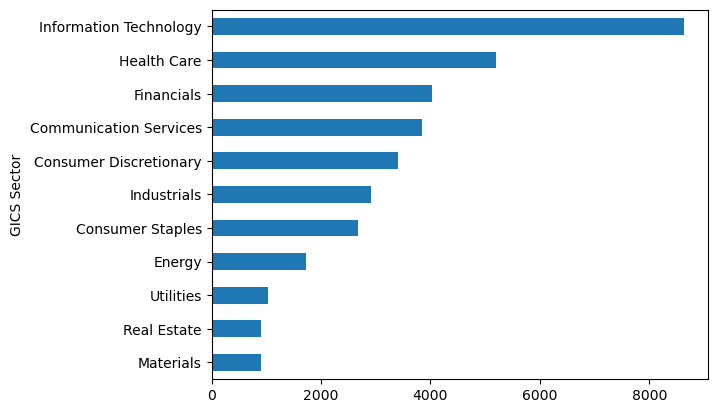

In [29]:
# visualize the market cap by sector as a bar chart
%matplotlib inline
sectorMarketCap = dfsp.groupby('GICS Sector')["MarketCapValue"].sum().sort_values()
sectorMarketCap.plot(kind='barh')

In [30]:
# summarize missing values
dfsp.isnull().sum()

Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         45
CIK                       0
Founded                   0
SymbolYahoo               5
Closing Price             5
Beta                      7
PE Ratio                 18
EPS                       5
MarketCapValue            5
dtype: int64

In [31]:
# find records with missing values
dfsp[dfsp["MarketCapValue"].isnull()]

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,SymbolYahoo,Closing Price,Beta,PE Ratio,EPS,MarketCapValue
Symbol,,,,,,,,,,,,,,
CDW,CDW,reports,Information Technology,Technology Distributors,"Lincolnshire, Illinois",2019-09-23,1402057,1984,NaN,NaN,NaN,NaN,NaN,NaN
GL,Globe Life,reports,Financials,Life & Health Insurance,"McKinney, Texas",1989-04-30,320335,1900,NaN,NaN,NaN,NaN,NaN,NaN
JKHY,Jack Henry & Associates,reports,Information Technology,Data Processing & Outsourced Services,"Monett, Missouri",2018-11-13,779152,1976,NaN,NaN,NaN,NaN,NaN,NaN
MKTX,MarketAxess,reports,Financials,Financial Exchanges & Data,"New York City, New York",2019-07-01,1278021,2000,NaN,NaN,NaN,NaN,NaN,NaN
TFX,Teleflex,reports,Health Care,Health Care Equipment,"Wayne, Pennsylvania",2019-01-18,96943,1943,NaN,NaN,NaN,NaN,NaN,NaN
